In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
data=pd.read_csv("Mall_Customers.csv")

In [4]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [12]:
print(data.columns)

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


In [24]:
x=data.drop(columns=['CustomerID', 'Gender', 'Age'],axis=1).values

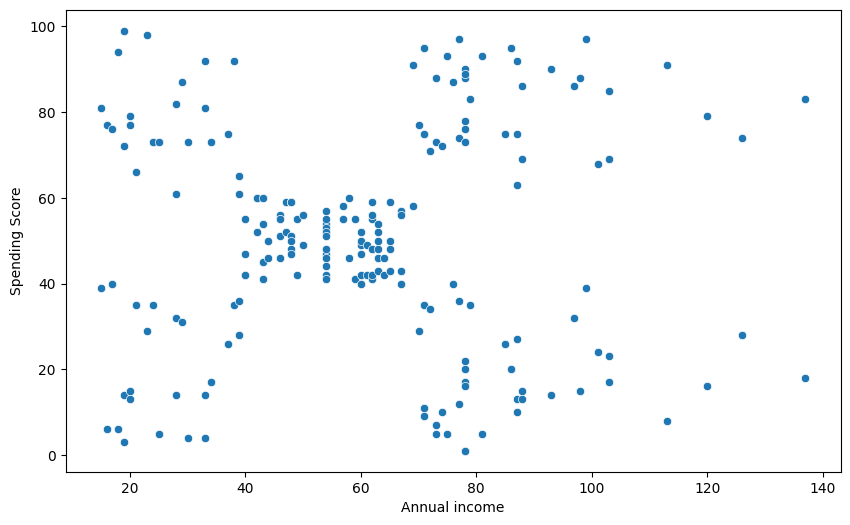

In [29]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=x[:,0],y=x[:, 1])
plt.xlabel("Annual income")
plt.ylabel("Spending Score")
plt.show()

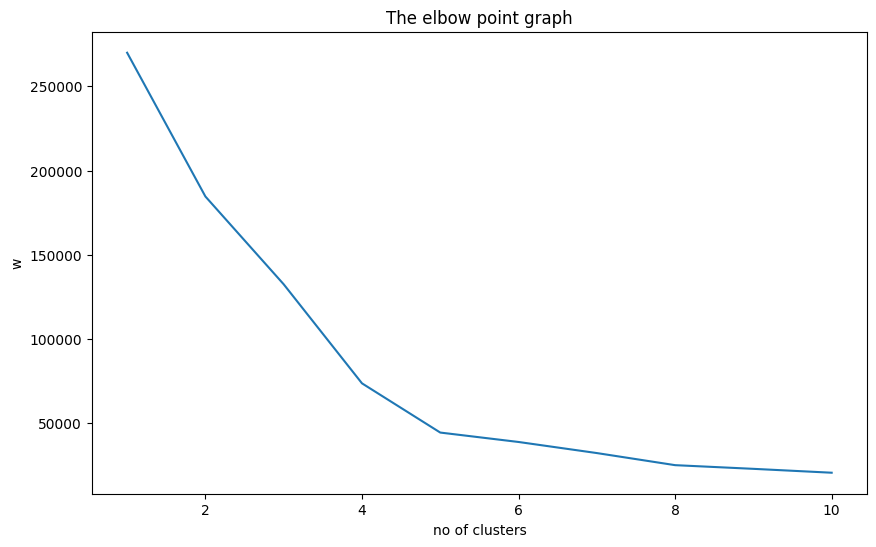

In [33]:
w=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=2)
    kmeans.fit(x)
    w.append(kmeans.inertia_)
plt.figure(figsize=(10,6))
plt.plot(range(1,11),w)
plt.title("The elbow point graph")
plt.xlabel("no of clusters")
plt.ylabel("w")
plt.show()

In [34]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=0)
y=kmeans.fit_predict(x)

In [35]:
kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636]])

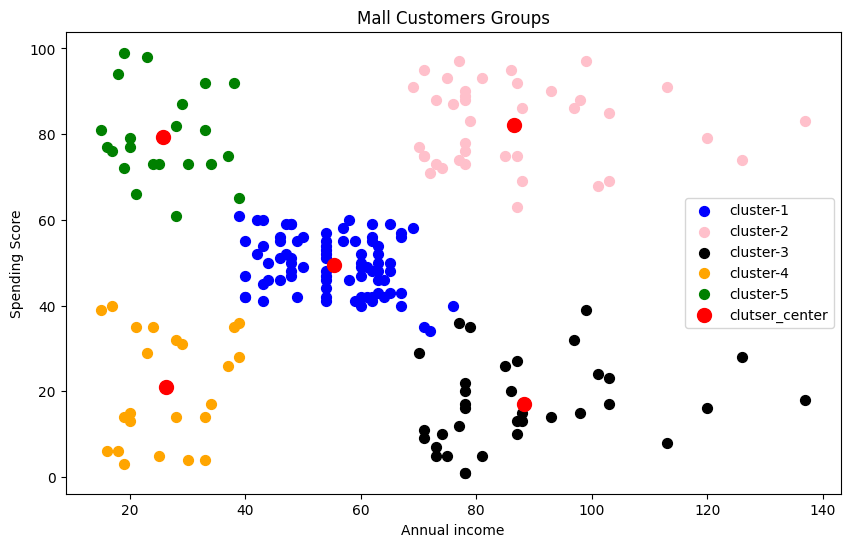

In [42]:
plt.figure(figsize=(10, 6))
plt.scatter(x[y==0, 0], x[y==0, 1], s=50, c="blue", label="cluster-1")
plt.scatter(x[y==1, 0], x[y==1, 1], s=50, c="pink", label="cluster-2")
plt.scatter(x[y==2, 0], x[y==2, 1], s=50, c="black", label="cluster-3")
plt.scatter(x[y==3, 0], x[y==3, 1], s=50, c="orange", label="cluster-4")
plt.scatter(x[y==4, 0], x[y==4, 1], s=50, c="green", label="cluster-5")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c="red", label="clutser_center")
plt.title("Mall Customers Groups")
plt.xlabel("Annual income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()
